# Salary Prediction Classification :
## Predict whether income exceeds $50K/yr based on census data

## Use of this classification :
- A bank wants to sell some offer. Now everyone cannot avail this offer, so the bank wants to do customer segmentation and they wants to know who earns more than 50k dollars per year because according to their plan people who have that much income can avail this offer. If they don't do this classification there will be loss for them because they'll sell the offer by tele-marketing and other methods and doing those for them who can't even avail the offer is a loss.

### The main objective of the analysis of this dataset is to determine whether a person makes over 50k dollars a year and if they do then sell the offer to them.

## Data-source : https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

In [1]:
import os

In [2]:
os.chdir("D:\projects\classification")

In [3]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 5069-5AB6

 Directory of D:\projects\classification

12-10-2022  18:16    <DIR>          .
12-10-2022  18:16    <DIR>          ..
12-10-2022  18:06           471,055 data classification.zip
12-10-2022  18:16         3,844,217 salary.csv
               2 File(s)      4,315,272 bytes
               2 Dir(s)  310,954,573,824 bytes free


# Importing The Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Reading The Dataset

In [7]:
data = pd.read_csv("salary.csv")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Attribute Information :

- age (numeric)
- workclass : type of job sector ('State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov','Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked')
- fnlwgt : final weights (numeric)
- education : upto the degree people studied ('Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', ' 5th-6th', '10th', '1st-4th',  'Preschool', '12th')
- education-num : no. of years studied (numeric)
- marital-status : ('Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed')
- occupation : different kind of jobs ('Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv')
- relationship : kind of relationship they are in ('Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative')
- race : different types of races
- sex : Gender (male or female)
- capital gain & capital loss : The net gains received or losses incurred during the reference period from the sale of capital property. This represents the proceeds of disposition minus the adjusted cost base of the property and outlays and expenses incurred to sell the property. Included with adjusted cost base are any expenses incurred to acquire the property and capital expenditures made toward property improvements with the exception of those that are current, such as ongoing repair or maintenance costs. Capital property includes depreciable property and any property which, if sold, would result in a capital gain or loss. (numeric)
- hours per week : no. of hours one work in a week (numeric)
- salary : binary class (<= 50k , > 50k)

In [8]:
data["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
data["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
data["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
data["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
data["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
data['workclass'] = data['workclass'].replace(' ?', np.nan)
data['occupation'] = data['occupation'].replace(" ?", np.nan)
data['native-country'] = data['native-country'].replace(" ?", np.nan)

In [14]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [15]:
data = data.dropna(how="any")

In [16]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


# EDA

In [18]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
data1 = data.drop("education-num", axis = 1)

<AxesSubplot:>

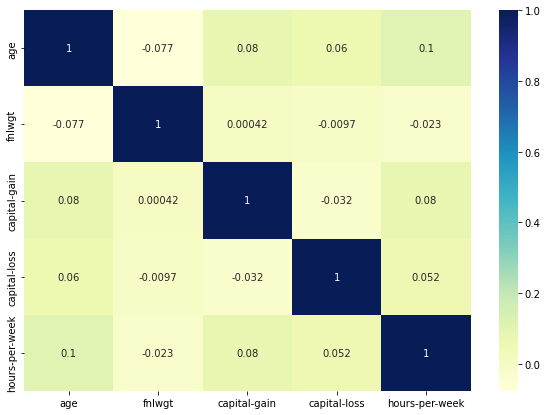

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(data1.corr(),annot=True,cmap='YlGnBu')

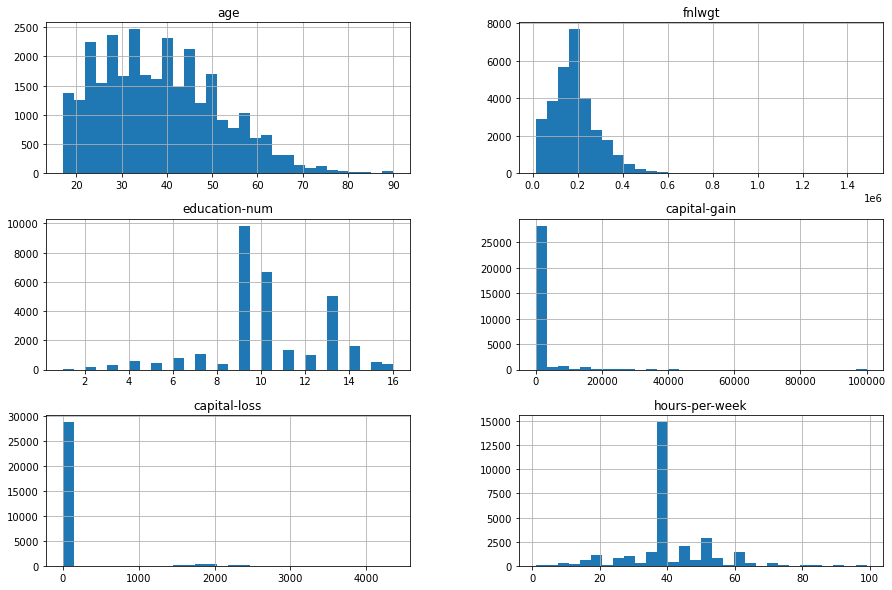

In [21]:
data.hist(figsize=(15,10), bins=30)
plt.show()

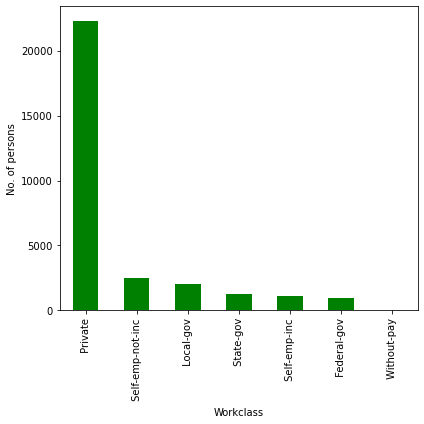

In [22]:
plt.figure(figsize=(6,6))
data.workclass.value_counts().plot(kind="bar", color="green")
plt.xlabel("Workclass")
plt.ylabel("No. of persons")
plt.tight_layout()
plt.show()

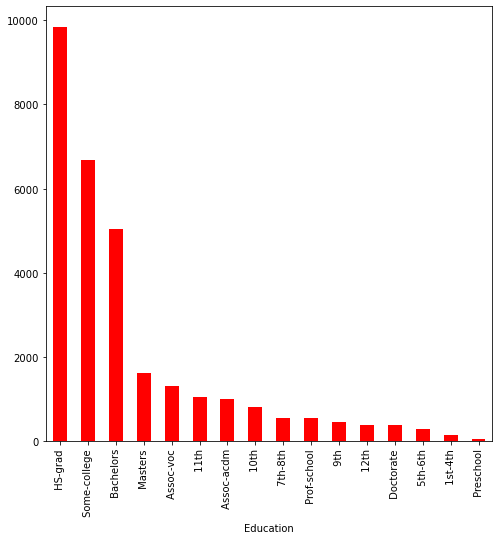

In [23]:
plt.figure(figsize=(8,8))
data['education'].value_counts().plot(kind='bar', color = "red")
plt.xlabel("Education")
plt.show()

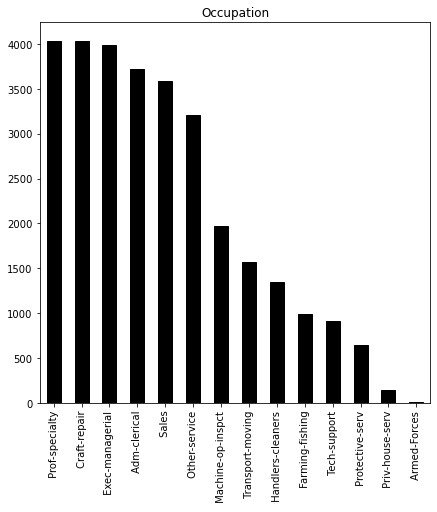

In [24]:
plt.figure(figsize=(7,7))
data['occupation'].value_counts().plot(kind="bar", color = "black", edgecolor="black")
plt.title("Occupation")
plt.show()

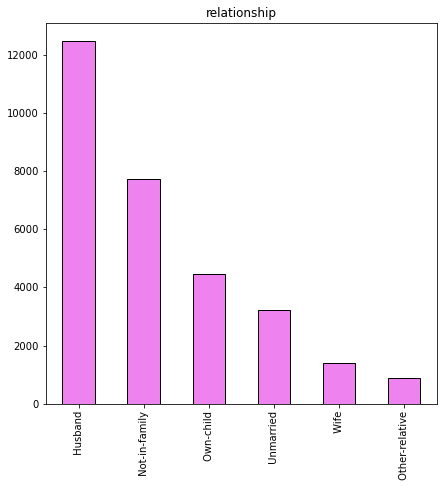

In [25]:
plt.figure(figsize=(7,7))
data['relationship'].value_counts().plot(kind="bar", color = "violet", edgecolor="black")
plt.title("relationship")
plt.show()

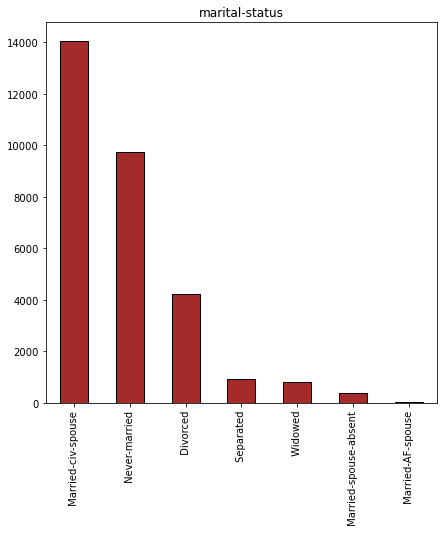

In [26]:
plt.figure(figsize=(7,7))
data['marital-status'].value_counts().plot(kind="bar", color = "brown", edgecolor="black")
plt.title("marital-status")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

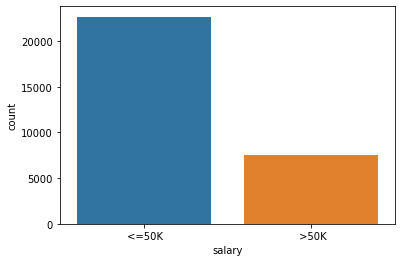

In [27]:
sns.countplot(data['salary'])

In [69]:
data["salary"].value_counts()

0    22654
1     7508
Name: salary, dtype: int64

In [28]:
w = data["education-num"]

In [29]:
pd.value_counts(w)

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

In [30]:
e = data["education"]

In [31]:
pd.value_counts(e)

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

## education and education-num is very much related
- HS-grad      : 9
- Some-college : 10  
- Bachelors    : 13 
- Masters      : 14
- Assoc-voc    : 11
- 11th         : 7
- Assoc-acdm   : 12
- 10th         : 6
- 7th-8th      : 4
- Prof-school  : 15 
- 9th          : 5
- 12th         : 8 
- Doctorate    : 16 
- 5th-6th      : 3
- 1st-4th      : 2 
- Preschool    : 1

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [34]:
p = ['occupation','workclass','education','marital-status','sex','relationship','salary']
for i in range(len(p)):
    data[p[i]] = labelencoder.fit_transform(data[p[i]])
data.head(n=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_6880\57184875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[p[i]] = labelencoder.fit_transform(data[p[i]])


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,77516,9,13,4,0,1,White,1,2174,0,40,United-States,0
1,50,4,83311,9,13,2,3,0,White,1,0,0,13,United-States,0
2,38,2,215646,11,9,0,5,1,White,1,0,0,40,United-States,0
3,53,2,234721,1,7,2,5,0,Black,1,0,0,40,United-States,0
4,28,2,338409,9,13,2,9,5,Black,0,0,0,40,Cuba,0
5,37,2,284582,12,14,2,3,5,White,0,0,0,40,United-States,0
6,49,2,160187,6,5,3,7,1,Black,0,0,0,16,Jamaica,0
7,52,4,209642,11,9,2,3,0,White,1,0,0,45,United-States,1
8,31,2,45781,12,14,4,9,1,White,0,14084,0,50,United-States,1
9,42,2,159449,9,13,2,3,0,White,1,5178,0,40,United-States,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int64 
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  int64 
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  int64 
 6   occupation      30162 non-null  int64 
 7   relationship    30162 non-null  int64 
 8   race            30162 non-null  object
 9   sex             30162 non-null  int64 
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 3.7+ MB


In [37]:
X = data.drop(["race","native-country","salary"], axis = 1)
Y = data["salary"]

In [38]:
X = np.array(X)
y = np.array(Y)

In [40]:
sc = preprocessing.MinMaxScaler()
X = sc.fit_transform(X)

In [49]:
x_train, x_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.20, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.3,random_state=0)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(24129, 12) (1810, 12) (4223, 12) (24129,) (1810,) (4223,)


In [50]:
MODEL = []
TEST = []
TRAIN = []
def eval(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))

# Decision Tree Classifier

In [51]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)  
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [52]:
pred1 = dtc.predict(x_test)
pd.DataFrame(np.c_[y_test,pred1],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1805,0,0
1806,0,0
1807,0,0
1808,0,0


----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1366
           1       0.73      0.52      0.61       444

    accuracy                           0.84      1810
   macro avg       0.80      0.73      0.75      1810
weighted avg       0.83      0.84      0.83      1810



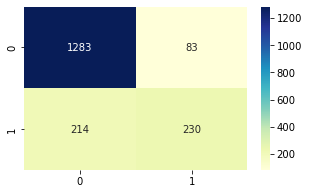

In [53]:
dtc_train = dtc.score(x_train, y_train)*100
dtc_test = dtc.score(x_test, y_test)*100
dtc_con = confusion_matrix(y_test,pred1)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,pred1))
plt.figure(figsize=(5,3))
sns.heatmap(dtc_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
eval('Decision Tree Classifier', 
     dtc_test, dtc_train)

# Random Forest Classifier

In [54]:
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=3)

In [55]:
pred2 = dtc.predict(x_test)
pd.DataFrame(np.c_[y_test,pred2],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1805,0,0
1806,0,0
1807,0,0
1808,0,0


----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1366
           1       0.73      0.52      0.61       444

    accuracy                           0.84      1810
   macro avg       0.80      0.73      0.75      1810
weighted avg       0.83      0.84      0.83      1810



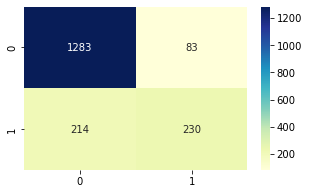

In [57]:
rfc_train = rfc.score(x_train, y_train)*100
rfc_test = rfc.score(x_test, y_test)*100
rfc_con = confusion_matrix(y_test,pred2)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,pred2))
plt.figure(figsize=(5,3))
sns.heatmap(rfc_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
eval('Random Forest Classifier',rfc_test,rfc_train)

# Support Vector Mechanism

In [58]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [59]:
pred3 = dtc.predict(x_test)
pd.DataFrame(np.c_[y_test,pred3],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1805,0,0
1806,0,0
1807,0,0
1808,0,0


----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1366
           1       0.73      0.52      0.61       444

    accuracy                           0.84      1810
   macro avg       0.80      0.73      0.75      1810
weighted avg       0.83      0.84      0.83      1810



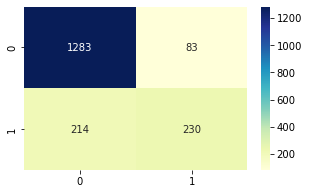

In [61]:
svm_train = svm.score(x_train, y_train)*100
svm_test = svm.score(x_test, y_test)*100
svm_con = confusion_matrix(y_test,pred3)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,pred3))
plt.figure(figsize=(5,3))
sns.heatmap(svm_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
eval('Support Vector Machine',svm_test,svm_train)

# Model Results Comparison

In [ ]:
results = pd.DataFrame({ 'Model': MODEL,
                         'Test Accuracy': TEST,
                         'Train Accuracy': TRAIN })

results.sort_values(by='Test Accuracy',ascending=False)

,Model,Test Accuracy,Train Accuracy
2,Support Vector Machine,82.38,84.47
0,Decision Tree Classifier,82.10,84.32
1,Random Forest Classifier,81.99,83.95


# Logistic regression :

In [62]:
from sklearn.linear_model import LogisticRegression

In [66]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(class_weight="balanced")
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [67]:
pred9 = logisticRegr.predict(x_test)
pd.DataFrame(np.c_[y_test,pred9],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1805,0,0
1806,0,0
1807,0,0
1808,0,0


----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1366
           1       0.54      0.80      0.65       444

    accuracy                           0.79      1810
   macro avg       0.73      0.79      0.75      1810
weighted avg       0.83      0.79      0.80      1810



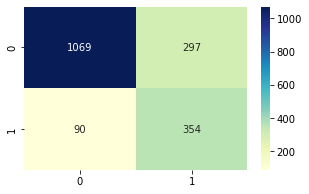

In [68]:
logisticRegr_train = logisticRegr.score(x_train, y_train)*100
logisticRegr_test = logisticRegr.score(x_test, y_test)*100
logisticRegr_con = confusion_matrix(y_test,pred9)
print("----------------------")
print("Classification Report")
print("----------------------")
print(classification_report(y_test,pred9))
plt.figure(figsize=(5,3))
sns.heatmap(logisticRegr_con, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
eval('Decision Tree Classifier', 
     logisticRegr_test, logisticRegr_train)